<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/LDA%20and%20AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [84]:
ppg_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                           names = np.arange(120))
ppg_10_beats = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_PPG_signals_10_beats_Aug_2022.csv",
                           names = np.arange(1024))
id = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv",names = ["ID"])
sys_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_SYS_BP_beats_P2P_Aug_2022.csv",
                     names = ["sys"])
dia_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Dia_BP_beats_P2P_Aug_2022.csv",
                     names = ["dia"])

In [85]:
df_info = pd.DataFrame()
 
df_info["dia"]  = dia_df
df_info["sys"]  = sys_df
df_info["ID"] = id

In [86]:
X = ppg_one_beat.values

In [6]:
y = df_info["sys"].values

In [7]:
type(y)

numpy.ndarray

In [8]:
for i in range(len(y)):
  if y[i] < 80:
    y[i] = 0
  elif y[i] < 90:
    y[i] = 1
  elif y[i] < 100:
    y[i] = 2
  elif y[i] < 110:
    y[i] = 3
  elif y[i] < 120:
    y[i] = 4 
  elif y[i] < 130:
    y[i] = 5
  elif y[i] < 140:
    y[i] = 6
  elif y[i] < 150:
    y[i] = 7
  elif y[i] < 160:
    y[i] = 8
  elif y[i] < 170:
    y[i] = 9
  elif y[i] < 180:
    y[i] = 10
  elif y[i] < 190:
    y[i] = 11
  else:
    y[i] = 12


In [9]:
y

array([5., 5., 4., ..., 1., 1., 1.])

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [11]:
lda = LinearDiscriminantAnalysis(n_components=12)
X_lda_comp = lda.fit(X, y).transform(X)

In [12]:
lda.explained_variance_ratio_

array([0.51752546, 0.16698827, 0.1229704 , 0.06028748, 0.05000757,
       0.02965918, 0.01789165, 0.01304061, 0.00952329, 0.00719488,
       0.00278347, 0.00212774])

In [13]:
X_lda_comp.shape

(154540, 12)

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


 
# initialise kmeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(X_lda_comp)
cluster_labels = kmeans.labels_

In [13]:
cluster_labels

array([11, 11, 11, ...,  5,  5,  5], dtype=int32)

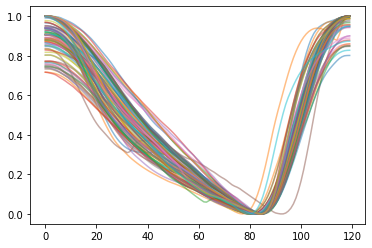

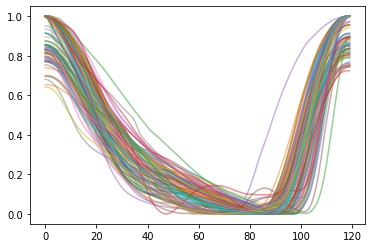

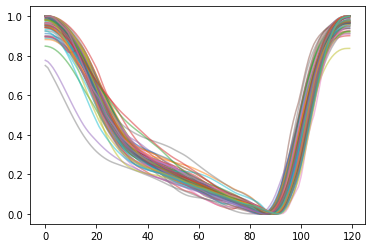

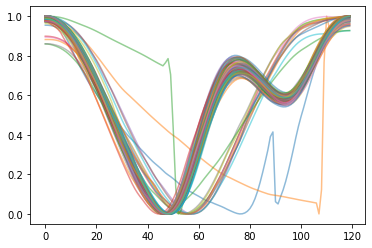

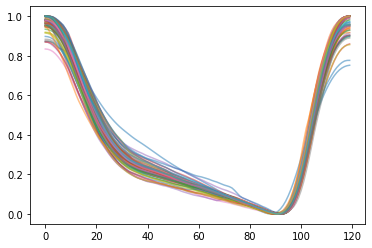

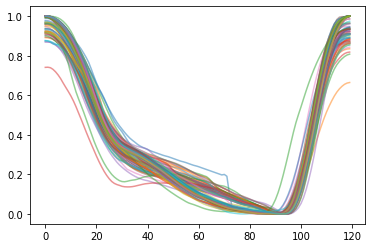

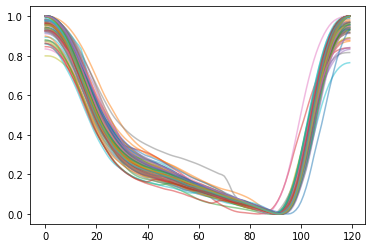

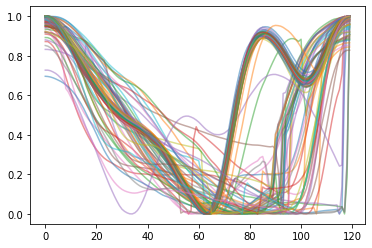

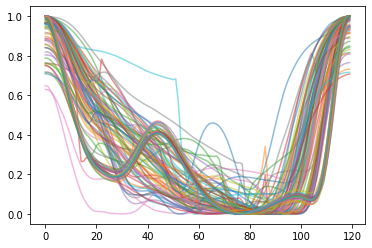

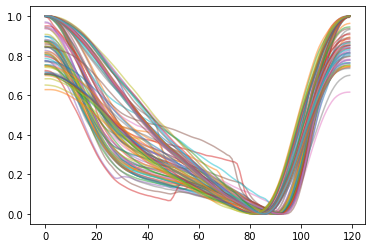

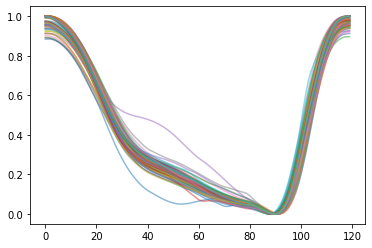

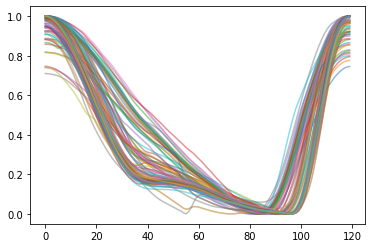

In [17]:
for i in range(12):
  plt.figure(i);
  plt.plot(ppg_one_beat[cluster_labels == i].values[:100].T,alpha = 0.5);

In [19]:
ppg_one_beat[cluster_labels == 1].values[:].shape

(20344, 120)

In [51]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [52]:
X.shape[0]*0.75

115905.0

In [53]:
X_train = X[:115905,:]
X_test = X[115905:,:]

In [60]:
X_train.shape

(115905, 120)

In [67]:
# AutoEncoder Model Preparation
n_inputs = X.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs/2)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 3
encoder= Dense(round(float(n_inputs) / 4))(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
n_bottleneck = round(float(n_inputs) / 20)
bottleneck = Dense(n_bottleneck)(encoder)

# define decoder, level 1
decoder = Dense(round(float(n_inputs) / 4.0))(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs/2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 3
decoder = Dense(n_inputs)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [68]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [69]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120)]             0         
                                                                 
 dense_38 (Dense)            (None, 120)               14520     
                                                                 
 batch_normalization_28 (Bat  (None, 120)              480       
 chNormalization)                                                
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 120)               0         
                                                                 
 dense_39 (Dense)            (None, 60)                7260      
                                                                 
 batch_normalization_29 (Bat  (None, 60)               240       
 chNormalization)                                          

In [70]:
history = model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,X_test))


Epoch 1/50
7245/7245 - 19s - loss: 0.0044 - val_loss: 0.0021 - 19s/epoch - 3ms/step
Epoch 2/50
7245/7245 - 18s - loss: 0.0015 - val_loss: 0.0017 - 18s/epoch - 2ms/step
Epoch 3/50
7245/7245 - 17s - loss: 0.0011 - val_loss: 0.0013 - 17s/epoch - 2ms/step
Epoch 4/50
7245/7245 - 17s - loss: 9.7455e-04 - val_loss: 8.0036e-04 - 17s/epoch - 2ms/step
Epoch 5/50
7245/7245 - 17s - loss: 8.6742e-04 - val_loss: 7.1233e-04 - 17s/epoch - 2ms/step
Epoch 6/50
7245/7245 - 17s - loss: 7.9071e-04 - val_loss: 5.8264e-04 - 17s/epoch - 2ms/step
Epoch 7/50
7245/7245 - 17s - loss: 7.3567e-04 - val_loss: 5.7777e-04 - 17s/epoch - 2ms/step
Epoch 8/50
7245/7245 - 17s - loss: 7.0481e-04 - val_loss: 5.7427e-04 - 17s/epoch - 2ms/step
Epoch 9/50
7245/7245 - 17s - loss: 6.6996e-04 - val_loss: 7.6821e-04 - 17s/epoch - 2ms/step
Epoch 10/50
7245/7245 - 17s - loss: 6.3509e-04 - val_loss: 6.1920e-04 - 17s/epoch - 2ms/step
Epoch 11/50
7245/7245 - 17s - loss: 6.1196e-04 - val_loss: 5.8117e-04 - 17s/epoch - 2ms/step
Epoch 12/5

In [73]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [87]:
encoder = load_model('encoder.h5')
encoder.summary()


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120)]             0         
                                                                 
 dense_38 (Dense)            (None, 120)               14520     
                                                                 
 batch_normalization_28 (Bat  (None, 120)              480       
 chNormalization)                                                
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 120)               0         
                                                                 
 dense_39 (Dense)            (None, 60)                7260      
                                                                 
 batch_normalization_29 (Bat  (None, 60)               240       
 chNormalization)                                         

In [88]:
X_encode = encoder.predict(X)

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


 
# initialise kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_encode)
cluster_labels = kmeans.labels_

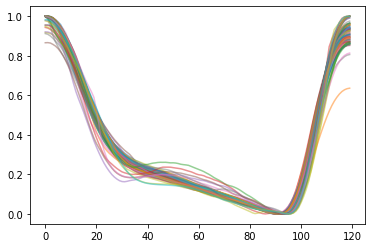

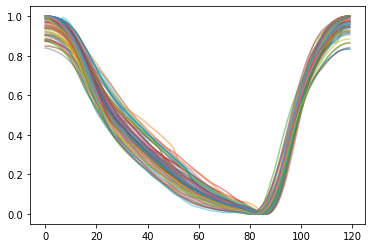

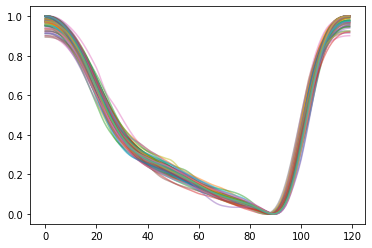

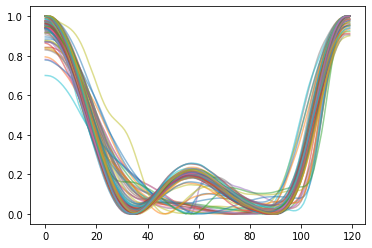

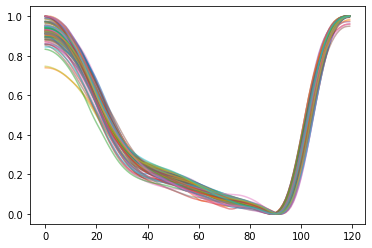

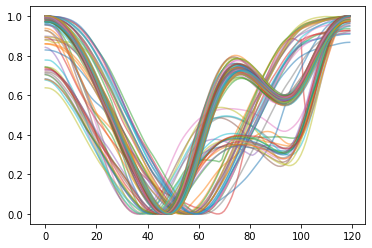

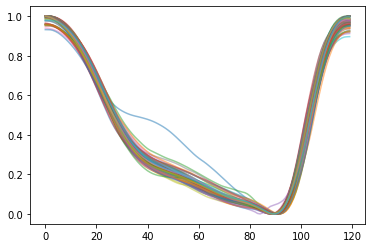

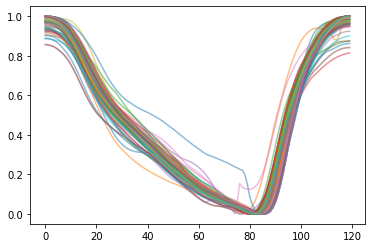

In [98]:
for i in range(8):
  plt.figure(i);
  plt.plot(ppg_one_beat[cluster_labels == i].values[:100].T,alpha = 0.5);

In [90]:
df_info["cluster"] = cluster_labels

In [95]:
df_info

,dia,sys,ID,clsuter
0,66.526,123.040,1,6
1,65.598,120.990,1,6
2,66.135,119.570,1,6
3,66.135,122.350,1,4
4,67.503,122.750,1,2
...,...,...,...,...
154535,58.357,88.240,3000,5
154536,58.983,88.240,3000,5
154537,58.670,86.988,3000,5
154538,58.044,88.866,3000,5


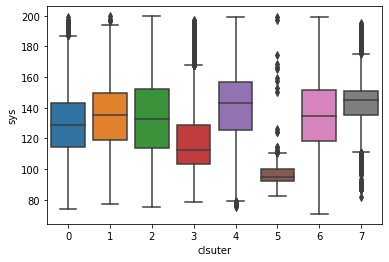

In [96]:
sns.boxplot(x = "clsuter",y="sys",data = df_info)

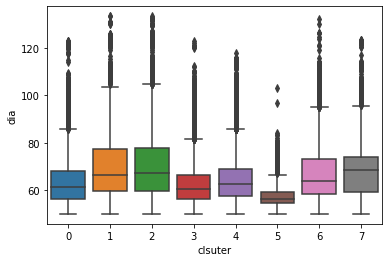

In [97]:
sns.boxplot(x = "clsuter",y="dia",data = df_info)

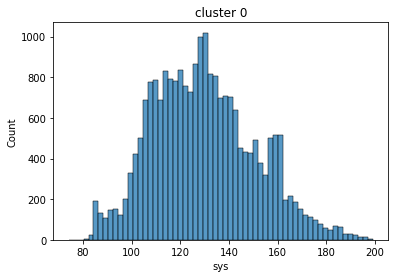

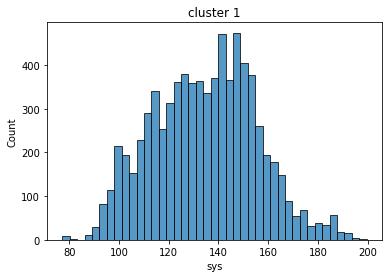

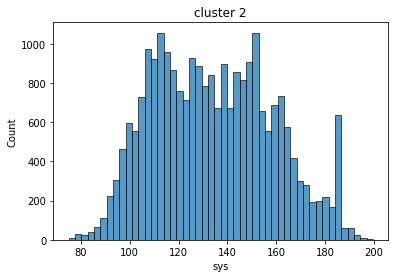

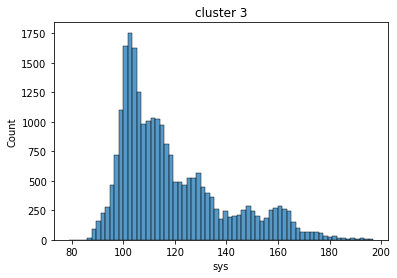

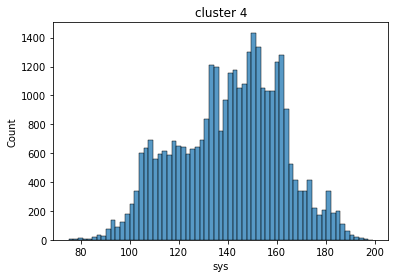

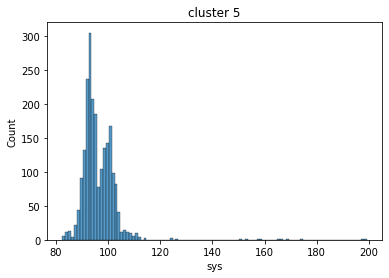

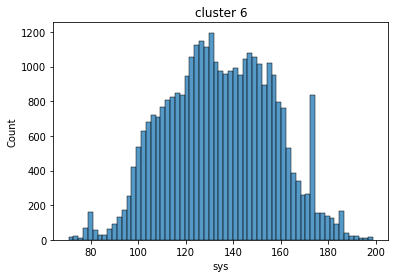

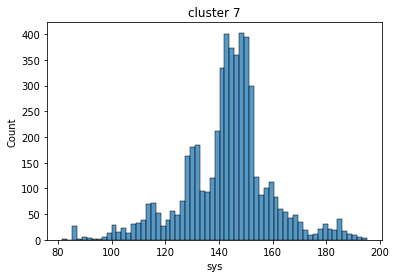

In [101]:
for i in range(8):
  plt.figure()
  plt.title("cluster "+str(i))
  sns.histplot(x = df_info["sys"][df_info ["clsuter"] == i]  )

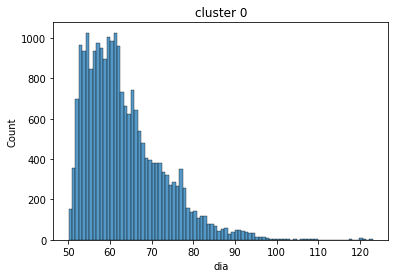

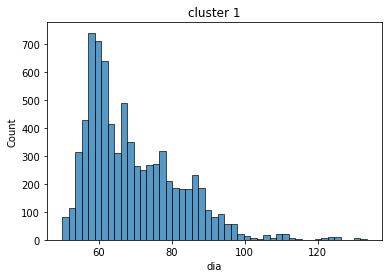

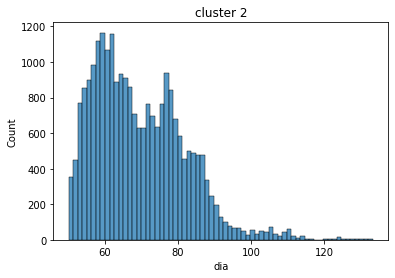

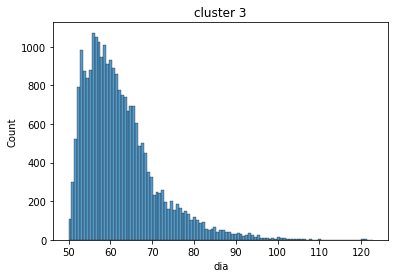

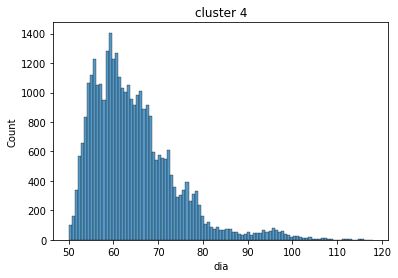

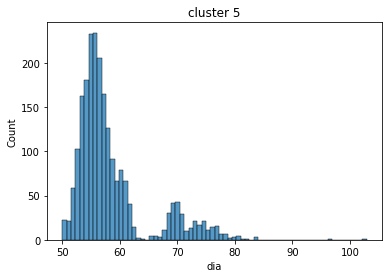

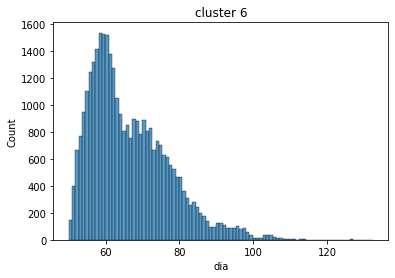

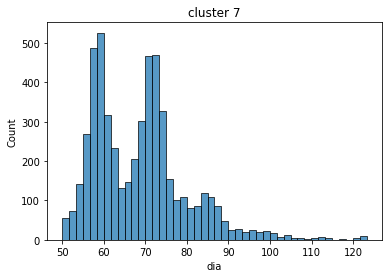

In [102]:
for i in range(8):
  plt.figure()
  plt.title("cluster "+str(i))
  sns.histplot(x = df_info["dia"][df_info ["clsuter"] == i]  )